# Flare 2017/09/10
# CaK

In [2]:
import time
time.sleep(60**2*0.3)

In [3]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from matplotlib import transforms

from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection


In [4]:
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un


In [5]:
def timeframe_to_filename_fits(frame):
    if frame <0 or frame > 7:
        raise IndexError(f'frame number {frame} is not in (0, 7).')
    else:
        return f"fits/CaK/nb_3950_2017-09-10T16_23_50_scan={frame+7}_corrected.fits"
ttff = timeframe_to_filename_fits

In [6]:
f.getheader(ttff(0))

SIMPLE  =                    T / Written by IDL:  Mon Feb 25 16:00:23 2019      
BITPIX  =                  -32 /                                                
NAXIS   =                    5 / Number of data axes                            
NAXIS1  =                 1632 /                                                
NAXIS2  =                 1094 /                                                
NAXIS3  =                   39 /                                                
NAXIS4  =                    1 /                                                
NAXIS5  =                    1 /                                                
EXTEND  =                    T / The file has extension(s).                     
TIMESYS = 'UTC     '           /                                                
DATE    = '2019-02-25T16:00:23' / Creation UTC date of FITS header              
CONTINUE  'fbd' /  MOMFBD restored data                                         
VAR_KEYS= 'VAR-EXT-DATE-BEG;

In [7]:
with f.open(timeframe_to_filename_fits(3)) as io :
    wvl0 = io[1].data
    print(wvl0)
    print(io)
    for i in range(len(io)):
        print(io[i].data)
    

[([[[[  928.43767279,  -164.94762049,   393.269984  , 59233.93882   ], [  990.25257279,  -164.94762049,   393.269984  , 59233.93882   ]], [[  928.43767279,  -123.52292049,   393.269984  , 59233.93882   ], [  990.25257279,  -123.52292049,   393.269984  , 59233.93882   ]]], [[[  928.43767279,  -164.94762049,   393.285032  , 59234.31432   ], [  990.25257279,  -164.94762049,   393.285032  , 59234.31432   ]], [[  928.43767279,  -123.52292049,   393.285032  , 59234.31432   ], [  990.25257279,  -123.52292049,   393.285032  , 59234.31432   ]]], [[[  928.43767279,  -164.94762049,   393.304944  , 59234.59892   ], [  990.25257279,  -164.94762049,   393.304944  , 59234.59892   ]], [[  928.43767279,  -123.52292049,   393.304944  , 59234.59892   ], [  990.25257279,  -123.52292049,   393.304944  , 59234.59892   ]]], [[[  928.43767279,  -164.94762049,   393.314976  , 59234.88393   ], [  990.25257279,  -164.94762049,   393.314976  , 59234.88393   ]], [[  928.43767279,  -123.52292049,   393.314976  , 59

## Remark: A very nested dataset: Two observations are merged here at once!!!

In [8]:
wvl = wvl0[0][0]

wvl2 = wvl.transpose()[2][0, 0]*10
xy_grid = wvl.transpose()
np.save('line_data/wav_sstCaK.npy', wvl2)
wvl.shape,  wvl2, wvl2.shape, xy_grid

((39, 2, 2, 4),
 array([3932.69984001, 3932.85032001, 3933.04944001, 3933.14976001,
        3933.25008001, 3933.3504    , 3933.45072   , 3933.54952   ,
        3933.63008   , 3933.7       , 3933.76992   , 3933.85048   ,
        3933.94928   , 3934.0496    , 3934.14991999, 3934.25023999,
        3934.35055999, 3934.54967999, 3934.70015999, 3967.49984001,
        3967.65032001, 3967.84944001, 3967.94976001, 3968.05008001,
        3968.1504    , 3968.25072   , 3968.34952   , 3968.43008   ,
        3968.5       , 3968.56992   , 3968.65048   , 3968.74928   ,
        3968.8496    , 3968.94991999, 3969.05023999, 3969.15055999,
        3969.34967999, 3969.50015999, 4001.14743998]),
 (39,),
 array([[[[  928.43767279,   928.43767279,   928.43767279,
             928.43767279,   928.43767279,   928.43767279,
             928.43767279,   928.43767279,   928.43767279,
             928.43767279,   928.43767279,   928.43767279,
             928.43767279,   928.43767279,   928.43767279,
             9

In [9]:
time_list = []
for i in range(8):
    time_list.append(f.getheader(ttff(i))["DATE-AVG"][11:23])
time_list

['16:26:14.113',
 '16:26:33.496',
 '16:26:53.623',
 '16:27:13.400',
 '16:27:33.462',
 '16:27:52.937',
 '16:28:12.705',
 '16:28:32.159']

fits/CaK/nb_3950_2017-09-10T16_23_50_scan=7_corrected.fits
s=(39, 1094, 1632)
the shape of the data is (8, '??', 39, 1094, 1632)
the wavelengths are self._wavel = array([3932.69984001, 3932.85032001, 3933.04944001, 3933.14976001,
       3933.25008001, 3933.3504    , 3933.45072   , 3933.54952   ,
       3933.63008   , 3933.7       , 3933.76992   , 3933.85048   ,
       3933.94928   , 3934.0496    , 3934.14991999, 3934.25023999,
       3934.35055999, 3934.54967999, 3934.70015999, 3967.49984001,
       3967.65032001, 3967.84944001, 3967.94976001, 3968.05008001,
       3968.1504    , 3968.25072   , 3968.34952   , 3968.43008   ,
       3968.5       , 3968.56992   , 3968.65048   , 3968.74928   ,
       3968.8496    , 3968.94991999, 3969.05023999, 3969.15055999,
       3969.34967999, 3969.50015999, 4001.14743998])
defining no boundary for shape (8, '??', 39, 1094, 1632)

(1094, 1632) (1094, 1632)
Boundary
Blue=Outside, yellow=Inside


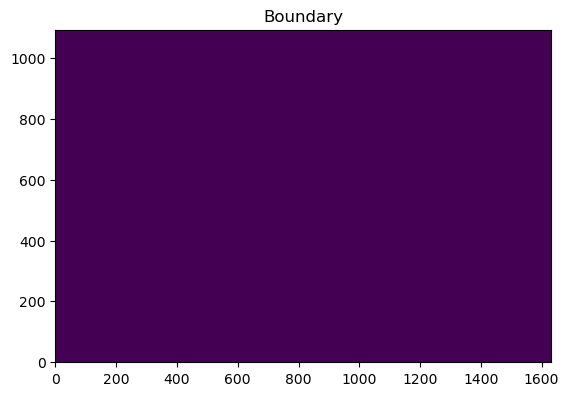

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


In [10]:
reload(un)
CaK = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_sstCaK.npy', number_of_frames=8,
                 time=time_list, name_of_line='CaK17a', thresh=[0, 100000],  boundary_methode='No Boundary', boundary_arguments = {"error":0.001},
                 with_stokes=True, with_time = True)
# CaKdatacube
# np.shape(CaK.datacube), CaKdatacube(0)[0:30:5,10:20:5, 100:200:30]

# TODO: boundary by hand to exclude part of captured solar limb

In [11]:
CaK.calculate__FOV_spect_over_time()

In [12]:
secs = un.get_TIME(CaK)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} for this line!")
print(f'{CaK.shape=}')

Not official start flare defined for CaK17a falling back to first of TIME[0], the execpt_time 16:26:14.113.
the mean cadence is 19.714285714285325 for this line!
CaK.shape=(8, '??', 39, 1094, 1632)


[[4.5, 3.75], [14.5, 3.75], [24.5, 3.75]]


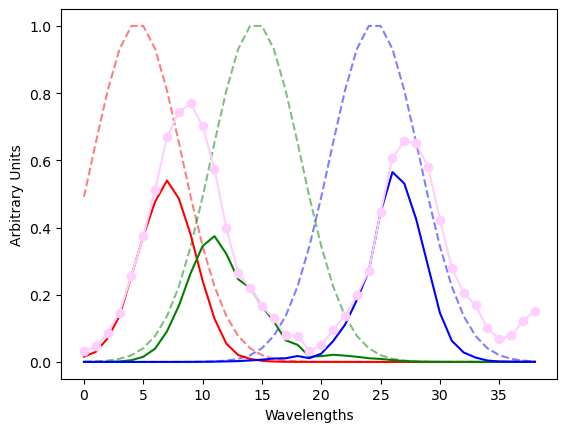

In [13]:
# %matplotlib inline
gf = un.guess_filters(30)
print(gf)
CaK.update_filters(gf)# [[3,2], [7,2], [11,2]]
CaK.plot_filt(880,900)
plt.show()

In [14]:
# # %matplotlib widget
# for frame in range(0,CaK._number_of_frames, 3):
#     # frame=0
#     CaK.ccp_frame(frame,Show=False)
#     plt.imshow(CaK.current_ccp, origin='lower')
#     # plt.imshow(CaK.calculate_boundary(frame=frame, error=0.0005), alpha=0.2)

#     # plt.imshow(CaK.boundary, origin='lower', alpha=0.2)
#     plt.show()
#     print(np.shape(CaK.current_ccp))#,np.shape(CaK.boundary))

In [15]:
# fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))

# frame = 5
# CaK.ccp_frame(frame,Show=False)


# ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
# CaK.frame_integrated_spect(frame)
# ax[0].plot(CaK._wavel, CaK.av_spect, label='sst data')
# ax[0].legend()
# ax[1].imshow(Image.fromarray(CaK.current_ccp), origin='lower')
# ax[1].set_title("COCOplot of frame "+str(frame))
# plt.show()

In [16]:
# CaK.current_ccp[0:30:10,0:60:20,:]
# CaK.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

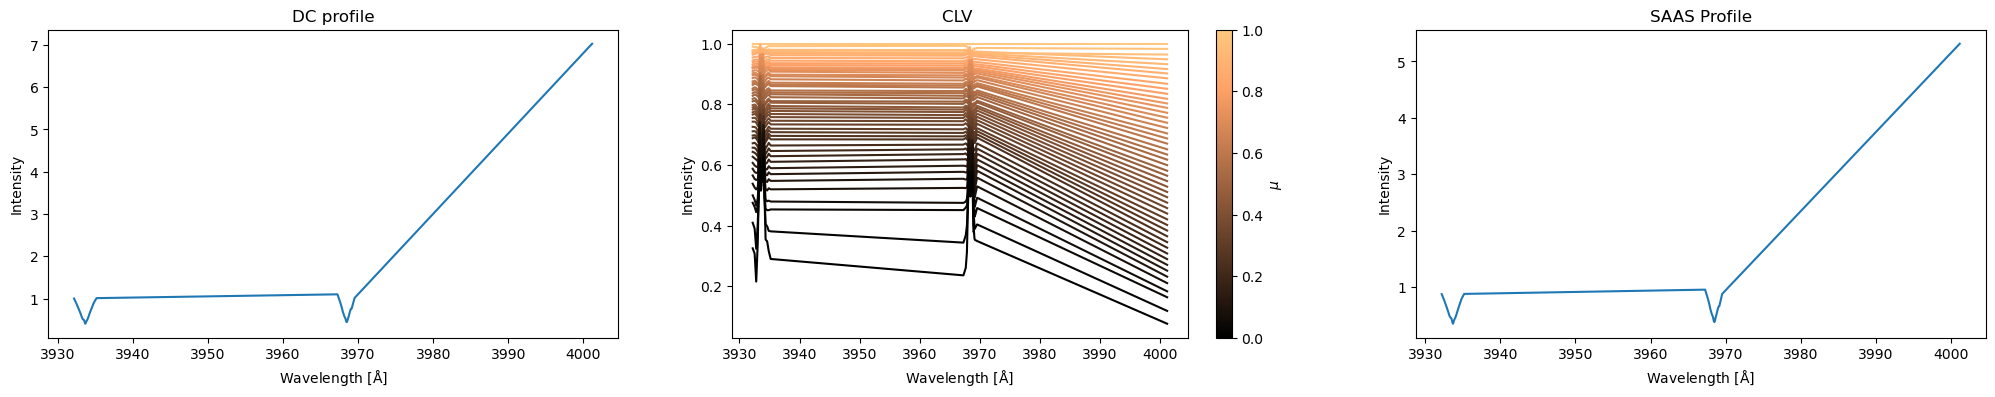

3935.025480025824 3951.030569782743


In [17]:

# theor_CaK= un.linestudier('E:/solar flares/data/2017-09-06/fits/3968_clv.fits', nr=101, neglect_atlas=True)
# print(np.median(theor_CaK.sst_wav), np.mean(theor_CaK.sst_wav))

# theor_CaK= un.linestudier('E:/solar flares/data/2017-09-06/fits/3934_clv.fits', nr=101, neglect_atlas=True)
# theor_CaK.saas_profile_atlas_check(show_all=True)
# print(np.median(theor_CaK.sst_wav), np.mean(theor_CaK.sst_wav))

theor_CaK= un.linestudier('E:/solar flares/data/2017-09-06/line_data/final_3950.npy', nr=101, neglect_atlas=True)
theor_CaK.saas_profile_atlas_check(show_all=True)
print(np.median(theor_CaK.sst_wav), np.mean(theor_CaK.sst_wav))

# theor_CaK= un.linestudier('D:/solar flares/data/2017-09-06/line_data/final_3934.npy', atlas=atlas, nr=101, neglect_atlas=True)
# theor_CaK.saas_profile_atlas_check(show_all=True)
# print(np.median(theor_CaK.sst_wav), np.mean(theor_CaK.sst_wav))

## Calculating the $\mu$ !!!!! 


In [18]:
CaK.shape

(8, '??', 39, 1094, 1632)

In [19]:
xy_grid

array([[[[  928.43767279,   928.43767279,   928.43767279,
            928.43767279,   928.43767279,   928.43767279,
            928.43767279,   928.43767279,   928.43767279,
            928.43767279,   928.43767279,   928.43767279,
            928.43767279,   928.43767279,   928.43767279,
            928.43767279,   928.43767279,   928.43767279,
            928.43767279,   928.43767279,   928.43767279,
            928.43767279,   928.43767279,   928.43767279,
            928.43767279,   928.43767279,   928.43767279,
            928.43767279,   928.43767279,   928.43767279,
            928.43767279,   928.43767279,   928.43767279,
            928.43767279,   928.43767279,   928.43767279,
            928.43767279,   928.43767279,   928.43767279],
         [  928.43767279,   928.43767279,   928.43767279,
            928.43767279,   928.43767279,   928.43767279,
            928.43767279,   928.43767279,   928.43767279,
            928.43767279,   928.43767279,   928.43767279,
            9

In [20]:
def timeframe_to_extent(frame, timeframe_to_filename_fits, flip=False, invert=False, shift=(0,0)):
    with f.open(timeframe_to_filename_fits(frame)) as io :
        wvl = io[1].data[0][0]
    extent = wvl[0,0:2,0:2, 0:2]
    a,b = shift
    if not flip:
        extent = [extent[0,0, 0]+a, extent[1,1, 0]+a, extent[0,0, 1]+b, extent[1,1, 1]+b]
    else:
        extent = [extent[0,0, 1]+a, extent[1,1, 1]+a, extent[0,0, 0]+b, extent[1,1, 0]+b]
    if invert:
        extent = [extent[1], extent[0], extent[3], extent[2]]
    print(f"extent timeframe {frame} is ", extent)
    return extent

def extent2mid(extent):
    return ((extent[0]+extent[1])/2, (extent[2]+extent[3])/2)

def calculate_mu(x,y, radius=959.63):
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    rad_dist =  (x**2 + y**2)**0.5/radius
    return np.cos(np.arcsin(rad_dist))

import numpy as np

def rotate_mesh_around_average(xx, yy, angle):
  """
  Rotates an xy mesh around its average position.

  Args:
      xx: A 2D NumPy array representing the x-coordinates of the mesh.
      yy: A 2D NumPy array representing the y-coordinates of the mesh.
      angle: The rotation angle in radians. Positive values represent counter-clockwise rotation.

  Returns:
      A tuple of 2D NumPy arrays representing the rotated x and y coordinates (xx_rot, yy_rot).
  """

  # Calculate the average x and y coordinates
  avg_x = np.mean(xx)
  avg_y = np.mean(yy)

  # Shift the mesh to center it around the average
  xx_centered = xx - avg_x
  yy_centered = yy - avg_y

  # Rotate the centered mesh coordinates
  xx_rot = np.cos(angle) * xx_centered -np.sin(angle) * yy_centered  + avg_x
  yy_rot = np.sin(angle) * xx_centered + np.cos(angle) * yy_centered + avg_y

  return xx_rot, yy_rot



def extent_to_grid(extent, shape, invert=False, angle=0):

    x = np.linspace(extent[0], extent[1], shape[4])
    y = np.linspace(extent[2], extent[3], shape[3])
    if invert:
        x = x[::-1]
        y = y[::-1]

    xx, yy = np.meshgrid(x, y)
    if angle != 0:
        xx, yy = rotate_mesh_around_average(xx, yy, angle)

    MU = calculate_mu(xx,yy)
    print("does MU contain nan's?", np.any(np.isnan(MU)))
    return xx, yy, MU


def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]

def local_rotation(extent, rad_rot):
    mid = extent2mid(extent)
    x = np.array(mid) 
    R = np.array([[np.cos(rad_rot), -np.sin(rad_rot)], [np.sin(rad_rot), np.cos(rad_rot)]])
    y = np.dot(R, x)
    t = x-y

    return transforms.Affine2D().rotate_deg(rad_rot/np.pi*180).translate(t[0], t[1])

def square_full_mu_mesh(X,Y, angle, num=200):
    X = np.array([np.min(X), np.max(X)])
    Y = np.array([np.min(Y), np.max(Y)])
    X,Y = np.meshgrid(X,Y)
    X,Y = rotate_mesh_around_average(X,Y, angle)
    X = np.linspace(np.min(X), np.max(X), num)
    Y = np.linspace(np.min(Y), np.max(Y), num)
    X,Y = np.meshgrid(X,Y)
    MU = calculate_mu(X,Y)
    return MU, X, Y

def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name="", rotate=0):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        over.ccp_frame(timeFrame, Show=False)
        tr = local_rotation(extent, rotate)
        ax.imshow(Image.fromarray(over.current_ccp), transform=tr + ax.transData, origin='lower', extent=extent)
        K = MU * over.boundary
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    MU_, X, Y = square_full_mu_mesh(X,Y, angle=0, num=200)
    CS = ax.contour(X, Y, MU_)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        X, Y, _ = extent_to_grid(extent, (0,0,0,2,2), invert=False, angle=0)
        print(X,Y)
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp, rotate)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 

extent timeframe 0 is  [927.5853985708616, 989.4002985708617, -164.67796091731265, -123.25326091731263]


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_1040\466518928.py:29: RuntimeWarning: invalid value encountered in arcsin
  return np.cos(np.arcsin(rad_dist))


does MU contain nan's? True
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.12213310238951047 for timeframe 0
does MU contain nan's? True
[[927.58539857 989.40029857]
 [927.58539857 989.40029857]] [[-164.67796092 -164.67796092]
 [-123.25326092 -123.25326092]]
Coundourplot succesfully saved.


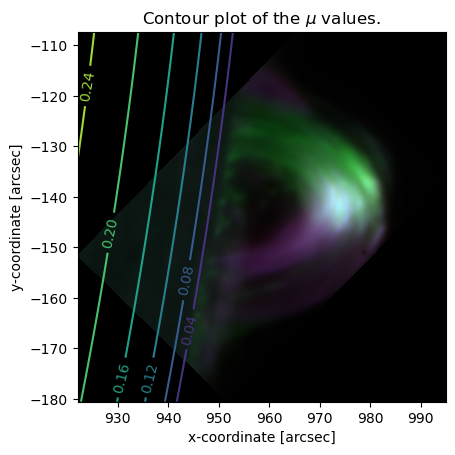

In [21]:
angle = 1.52*np.pi/6 + np.pi
frame = 0
extent = timeframe_to_extent(frame, ttff, invert=False, shift=(-1.2,0))
xx, yy, MU = extent_to_grid(extent, CaK.shape, invert=False, angle=angle)
xx0=xx
yy0=yy
from matplotlib import transforms


mu = give_mu_contourplot(
    MU,
    xx,
    yy,
    extent,
    over=CaK,
    save=True,
    save_name=CaK.name_of_line,
    timeFrame=frame,
    rotate=angle
)
sst_data = CaK
theor_line = theor_CaK
set_mu(CaK, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_CaK.index_mu], theor_line.sst_clv[theor_CaK.index_mu][0], clv_fit(mu, theor_line)



c:\Users\Gebruiker\Anaconda3\Lib\site-packages\nessi\integrator.py:382: RuntimeWarning: invalid value encountered in sqrt
  ipts = _np.vstack([_np.atleast_2d(x), _np.atleast_2d(y), _np.atleast_2d(_np.sqrt(1.-(x**2+y**2)))])
c:\Users\Gebruiker\Anaconda3\Lib\site-packages\nessi\integrator.py:358: RuntimeWarning: invalid value encountered in arcsin
  mu = _np.cos(_np.arcsin(rad_dist))


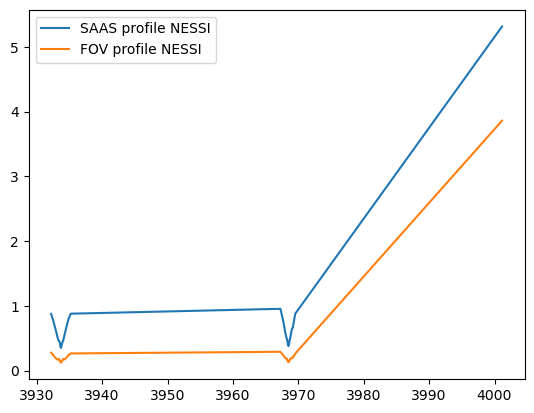

In [22]:
theor_CaK.set_fov( xx, yy, CaK.boundary, sr=959.63)

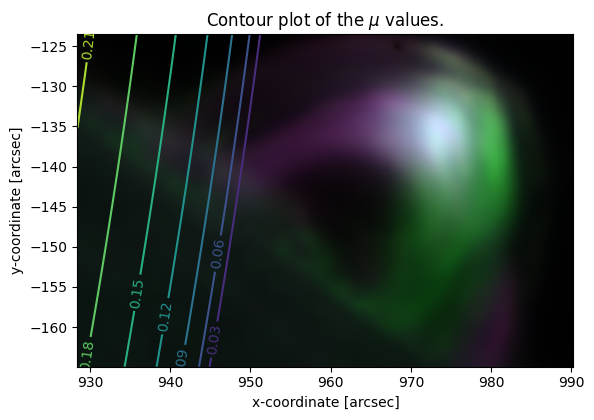

## Finding a suitable quiet sun patch

In [23]:
scaler = CaK.av_spect[0]
frame, CaK.shape

(0, (8, '??', 39, 1094, 1632))

<>:38: SyntaxWarning: invalid escape sequence '\C'
<>:38: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_1040\3238348657.py:38: SyntaxWarning: invalid escape sequence '\C'
  fig.savefig(f'plots\Choosing_quiet_sun_patch_CaK.png')


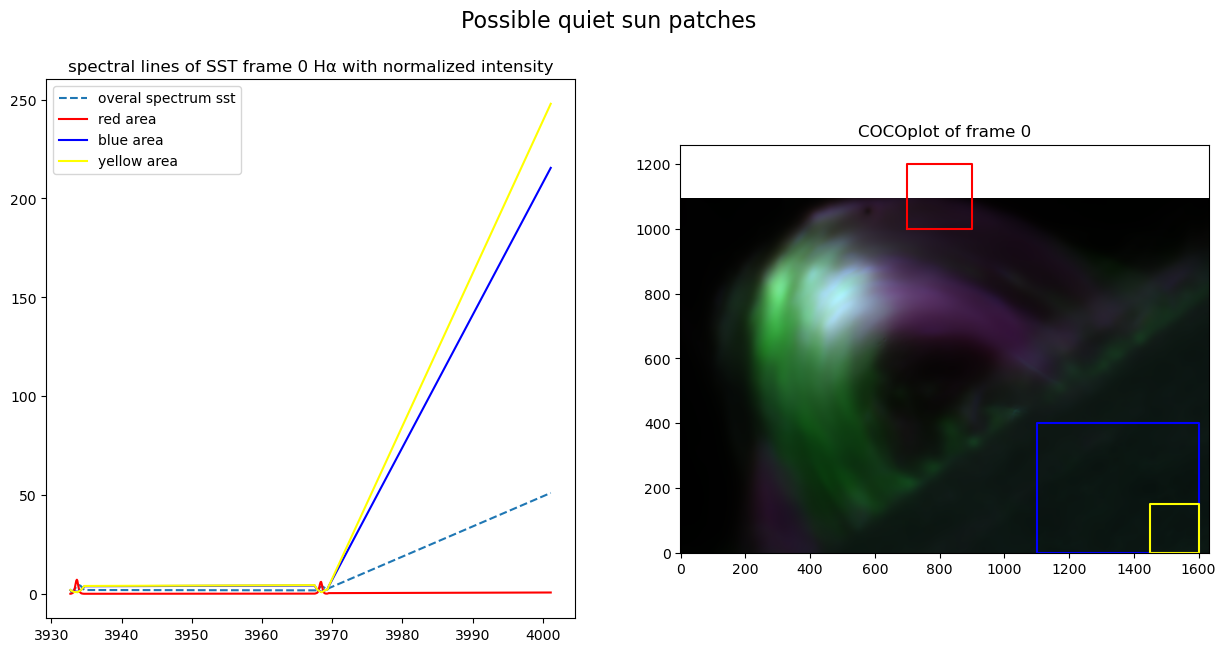

In [24]:
frame=0

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

CaK.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(700,900),(1000,1200)], [(1100, 1600), (0,400)], [(1450, 1600), (0,150)]]
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
CaK.frame_integrated_spect(frame)
ax[0].plot(CaK._wavel, CaK.av_spect/scaler, '--', label='overal spectrum sst')
# ax[0].plot(theor_CaK.sst_wav + theta[0], theta[2] * theor_CaK.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]
# ax[0].plot(theor_CaK.sst_wav + theta[0], theta[2] * theor_CaK.sst_dc*theor_CaK.sst_clv[12] + theta[1], '--', label='nessi mu = 0.76', color='black')

ax[1].imshow(CaK.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(CaK._wavel, CaK.frame_integrated_spect(frame, xlim=xlim, ylim=ylim)/scaler, color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_CaK.png')
plt.show()


###  quiet sun & the continuum point to gauge


In [25]:
color_wanted_patch = 'yellow'

the edges of the patch are denoted by the xlim: (1450, 1600) and ylim: (0, 150)


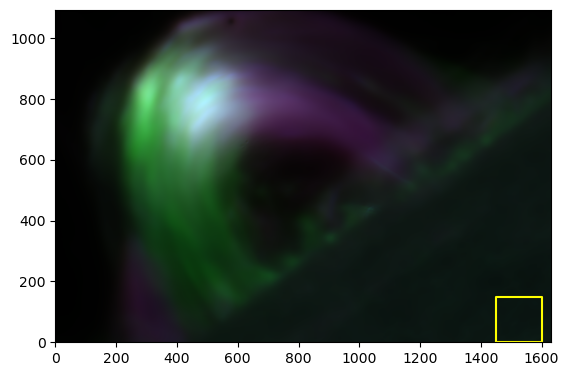

The quiet sun is pick at x (926.9110661101785, -150.64814017321783) with average              mu 0.20587311390933333
[[0.96586106 0.96583343 0.9658058  ... 0.96179904 0.96177141 0.96174378]
 [0.96588928 0.96586165 0.96583401 ... 0.96182726 0.96179963 0.961772  ]
 [0.9659175  0.96588986 0.96586223 ... 0.96185548 0.96182785 0.96180021]
 ...
 [0.97000906 0.96998143 0.96995379 ... 0.96594704 0.96591941 0.96589177]
 [0.97003728 0.97000964 0.96998201 ... 0.96597526 0.96594763 0.96591999]
 [0.97006549 0.97003786 0.97001023 ... 0.96600348 0.96597584 0.96594821]] [[-0.15282479 -0.15285301 -0.15288123 ... -0.15697279 -0.15700101
  -0.15702922]
 [-0.15285243 -0.15288064 -0.15290886 ... -0.15700042 -0.15702864
  -0.15705686]
 [-0.15288006 -0.15290828 -0.15293649 ... -0.15702806 -0.15705627
  -0.15708449]
 ...
 [-0.15688681 -0.15691503 -0.15694325 ... -0.16103481 -0.16106303
  -0.16109124]
 [-0.15691444 -0.15694266 -0.15697088 ... -0.16106244 -0.16109066
  -0.16111888]
 [-0.15694208 -0.15697029 -0.

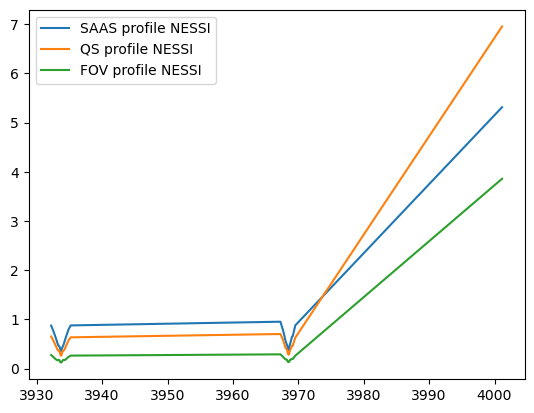

{'frame': 0, 'xlim': (1450, 1600), 'ylim': (0, 150), 'color': 'yellow'}

In [26]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

CaK.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
theor_CaK.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
CaK.quiet_sun

the theta fit is  [-4.547473508864641e-13, 0, 8.407664208674685]


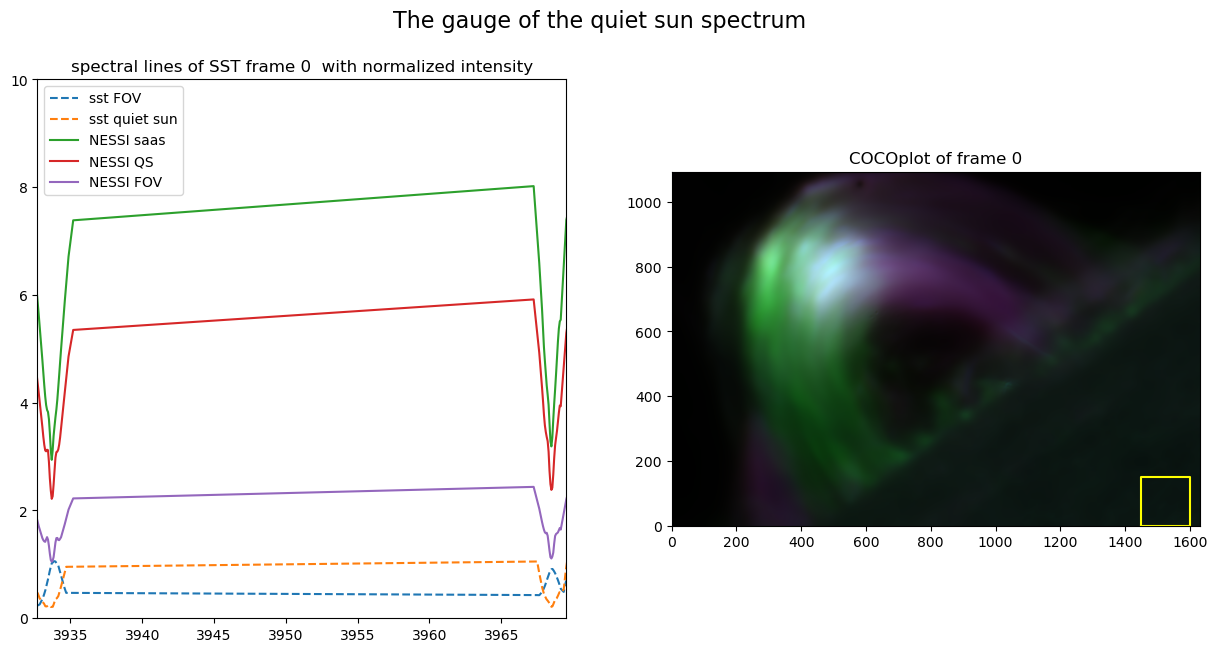

In [27]:
reload(un)
un.fit_qs_to_NESSI_cont_point(theor_CaK, CaK)

In [28]:

def fit_qs_to_NESSI_cont_point(theor_line, sst_data,  frame=0):
    xlim, ylim = theor_line.quiet_sun
    obs = sst_data.frame_integrated_spect(frame, xlim=xlim, ylim=ylim)
    theta = [sst_data._wavel[-1]-theor_line.sst_wav[-1], 0,  obs[-1] /theor_line.spectr_qs[-1]]
    sst_data.theta_nessi_to_quiet_sun = theta
    print("the theta fit is ",theta)

    f_nessi_qs = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.spectr_qs + theta[1]
                                    , kind='linear', fill_value="extrapolate")
    f_nessi_fov = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.spectr_fov + theta[1]
                                    , kind='linear', fill_value="extrapolate")
    f_nessi_saas = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.saas_profile + theta[1]
                                    , kind='linear', fill_value="extrapolate")
    
    
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
    # fig.setitle("quiet sun determination, weiging constants")

    fig.suptitle('The gauge of the quiet sun spectrum', fontsize=16)

    sst_data.ccp_frame(frame,Show=False)

    ax[0].set_title(
        f"spectral lines of SST frame {str(frame)}  with normalized intensity"
    )
    sst_data.frame_integrated_spect(frame)
    ax[0].plot(sst_data._wavel, sst_data.av_spect, '--', label='sst FOV')
    ax[0].plot(sst_data._wavel, sst_data.quiet_spect, '--', label='sst quiet sun') #

    ax[0].plot(theor_line.sst_wav + theta[0], f_nessi_saas(theta)(theor_line.sst_wav + theta[0]), label='NESSI saas')
    ax[0].plot(theor_line.sst_wav + theta[0], f_nessi_qs(theta)(theor_line.sst_wav + theta[0]), label='NESSI QS')
    ax[0].plot(theor_line.sst_wav + theta[0], f_nessi_fov(theta)(theor_line.sst_wav + theta[0]), label='NESSI FOV')
    ax[0].legend()
    ax[1].imshow(sst_data.current_ccp, origin='lower')
    color_wanted_patch = sst_data.quiet_sun['color']
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color_wanted_patch)
    ax[1].set_title(f"COCOplot of frame {str(frame)}")
    # ax[0].set_xlim(3932, 3936)
    # ax[0].set_ylim(0,10)
    plt.show()

the theta fit is  [-4.547473508864641e-13, 0, 8.407664208674685]


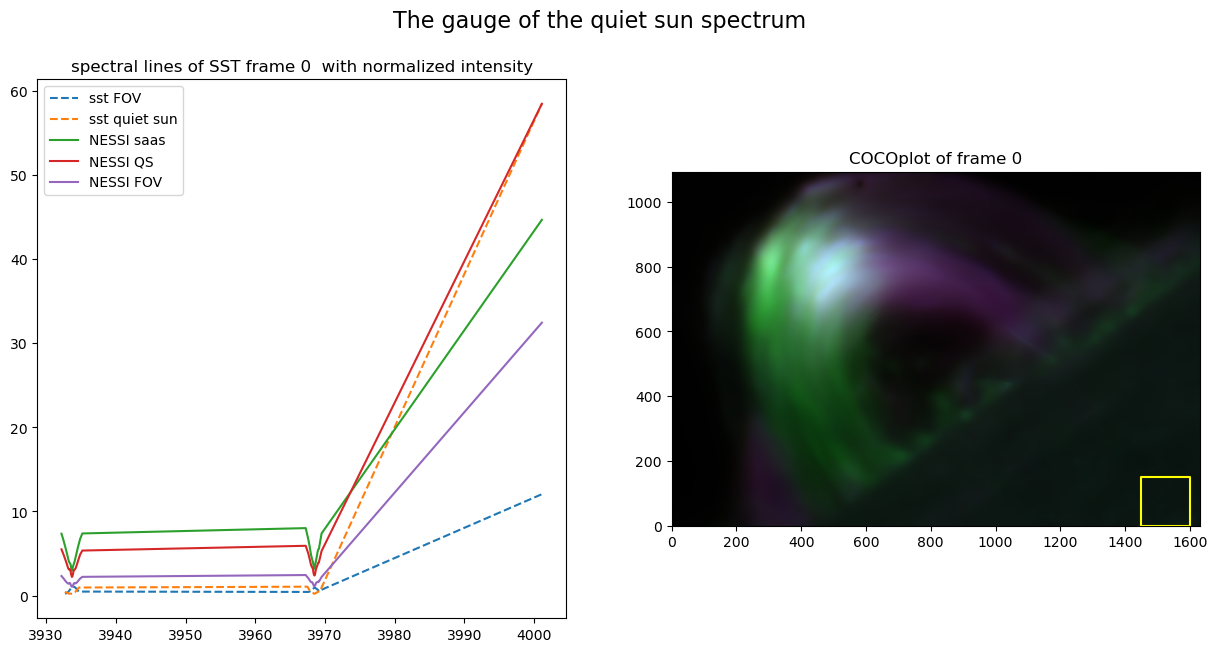

In [29]:
fit_qs_to_NESSI_cont_point(theor_CaK, CaK)

## The full FOV integrated spectrum over time:

In [30]:
sst_data = CaK
CaK.shape

(8, '??', 39, 1094, 1632)

In [31]:
CaK.calculate__FOV_spect_over_time()

# Best possible interval

![image.png](attachment:image.png)
<!-- ![IMG_20231123_130152(2).jpg](attachment:IMG_20231123_130152(2).jpg) -->

The goal is to find the best signal to noise ratio of detecting a flare by giving an optimal interval. Here we look at 
$$\frac{1}{\sigma}\frac{\Delta I}{I} $$
where $\sigma$ is the standard deviation of the spectrum in the interval PER UNIT AREA!(with following two options):

- Looking for an area $A$ under the interval with with $\Delta x$ for each pixel en then taking $\sum \frac{1}{n-1} (A - \bar{A})^2$
- looking at the standard deviation of the all of the wavelength values then averaging over those used in the interval. 

Remark: this has to be done per unit area or per pixel. 

Here we will display the standard devation for the two regimes for the Halpha line

In [32]:
sst_data.quiet_sun

{'frame': 0, 'xlim': (1450, 1600), 'ylim': (0, 150), 'color': 'yellow'}

E:\solar flares/data/2017-09-06\use_nessi3.py:1732: RuntimeWarning: divide by zero encountered in scalar divide
  return np.nanstd(np.sum(self.datacube(frame)[(wav<= interval[1]) &
E:\solar flares/data/2017-09-06\use_nessi3.py:1723: RuntimeWarning: invalid value encountered in scalar divide
  std = integral / l_interv / appr_num**0.5


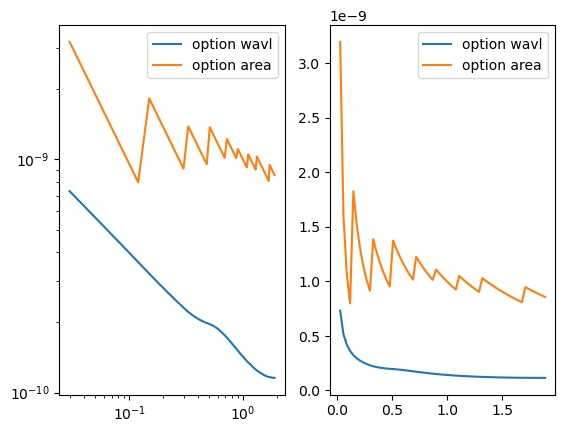

STD_Area = array([6.38958146e-09, 3.19479073e-09, 1.59739536e-09, 1.06493024e-09,
       7.98697682e-10, 1.82684275e-09, 1.52236896e-09, 1.30488768e-09,
       1.14177672e-09, 1.01491264e-09, 9.13421376e-10, 1.38649984e-09,
       1.27095818e-09, 1.17319217e-09, 1.08939273e-09, 1.01676655e-09,
       9.53218638e-10, 1.37354964e-09, 1.29724133e-09, 1.22896547e-09,
       1.16751719e-09, 1.11192114e-09, 1.06137927e-09, 1.01523234e-09,
       1.22488200e-09, 1.17588672e-09, 1.13066031e-09, 1.08878400e-09,
       1.04989886e-09, 1.01369545e-09, 1.10930795e-09, 1.07352383e-09,
       1.03997621e-09, 1.00846178e-09, 9.78801136e-10, 9.50835389e-10,
       9.24423295e-10, 1.05037390e-09, 1.02273248e-09, 9.96508574e-10,
       9.71595859e-10, 9.47898399e-10, 9.25329390e-10, 9.03810102e-10,
       1.02953546e-09, 1.00665690e-09, 9.84773052e-10, 9.63820434e-10,
       9.43740842e-10, 9.24480824e-10, 9.05991208e-10, 8.88226674e-10,
       8.71145392e-10, 8.54708687e-10, 8.38880748e-10, 8.23628371e

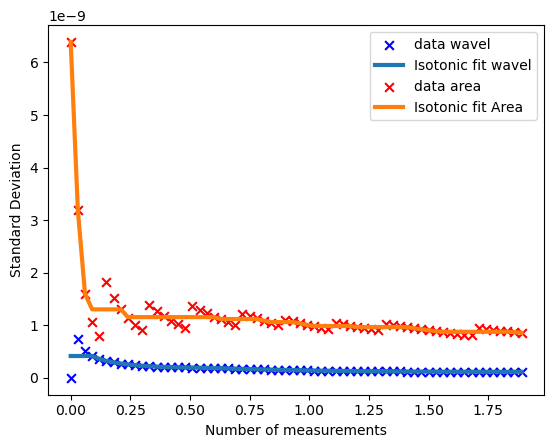

Not official start flare defined for CaK17a falling back to first of TIME[0], the execpt_time 16:26:14.113.
The maximal signal to noise ratio for the area criterion is if the interval is of width $\Delta x=0.24\AA$.
at an intesity of 1056232.3931091467. For a standard deviation of 1.1559548053895263e-09.

The maximal signal to noise ratio for the wavl criterion is if the interval is of width $\Delta x=0.39\AA$.
at an intesity of 5144722.924521813. For a standard deviation of 2.0914626985381783e-10.



E:\solar flares/data/2017-09-06\use_nessi3.py:1797: RuntimeWarning: invalid value encountered in scalar divide
  return Delta_i / I


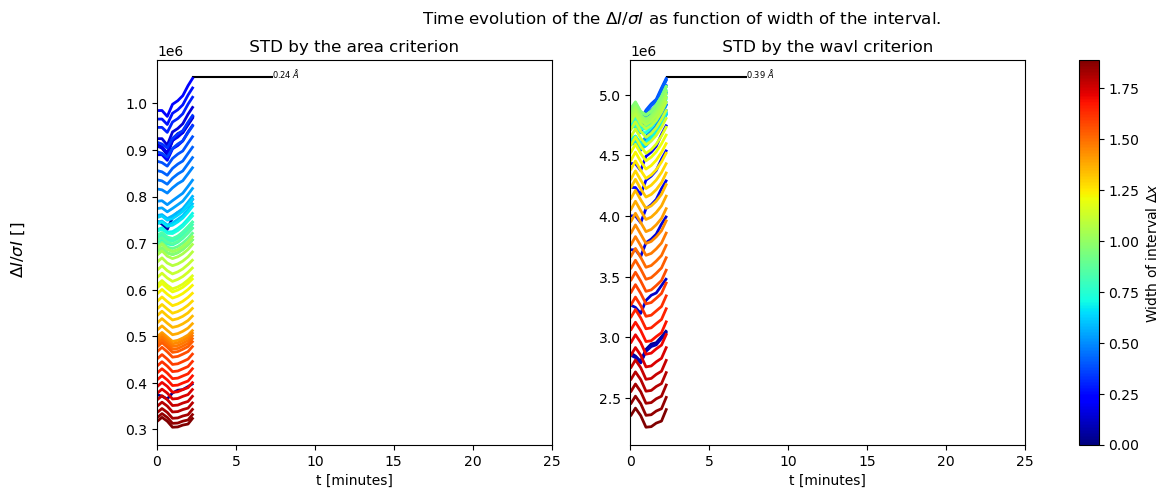

E:\solar flares/data/2017-09-06\use_nessi3.py:1967: RuntimeWarning: All-NaN slice encountered
  MAX = np.nanmax(A, axis=1)


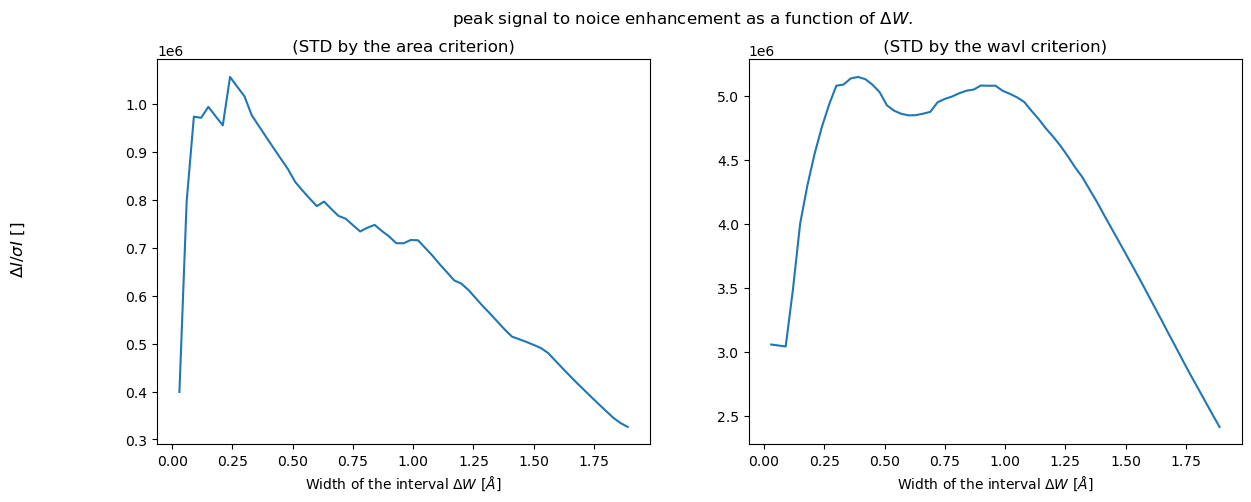

Directory 'line_data/optimal_width' already exists.


(array([[             nan,              nan,              nan,
                      nan,              nan,              nan,
                      nan,              nan],
        [ 374820.90146033,  371399.04817675,  365527.71249571,
          378535.54946547,  384313.86339585,  385654.35995396,
          392052.1710337 ,  399141.33480232],
        [ 747159.53521475,  741044.58724677,  729504.56993259,
          754903.17142877,  765842.04131661,  769082.90132761,
          782213.84103658,  796306.15215714],
        [ 912549.99163167,  905948.18974954,  892054.71734714,
          922423.80562575,  935072.75894001,  939729.15434538,
          956230.36187308,  973394.17561714],
        [ 909517.94892156,  903806.31177993,  890160.37743511,
          919775.72348373,  931670.09720697,  937010.35935443,
          953921.15087818,  970979.89720827],
        [ 924330.19406007,  924291.95014913,  910476.60693519,
          938757.1782567 ,  946169.24923235,  956341.55069151,
          9767

In [33]:
reload(un)
un.analyse_optimal_interval(sst_data=CaK, Deltas=np.arange(0,1.9, 0.03))

# Figure 4 In HARPS ALEX
![image.png](attachment:image.png)

Now we do it for the FOV spectum with as normalisation the quiet sun

In [34]:
sst_data = CaK

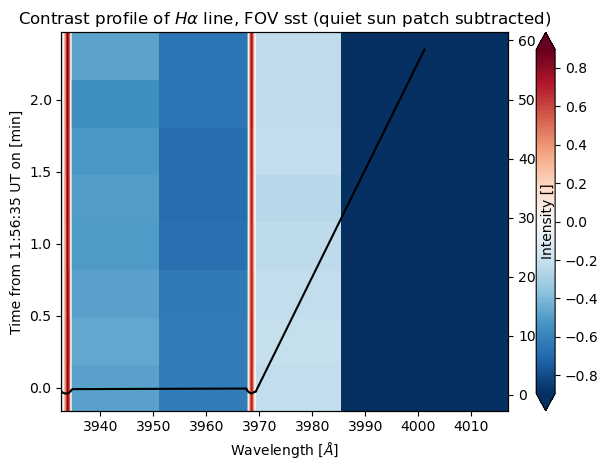

In [35]:
FOV_spectrum = CaK.FOV_spectrum
QS = sst_data.quiet_spect
Z = FOV_spectrum - QS
x = sst_data._wavel
y = CaK.TIME
TIME = y
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, FOV sst (quiet sun patch subtracted)')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,QS, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

For FOV with Nessi normalisation (of course fit to the quiet sun patch)

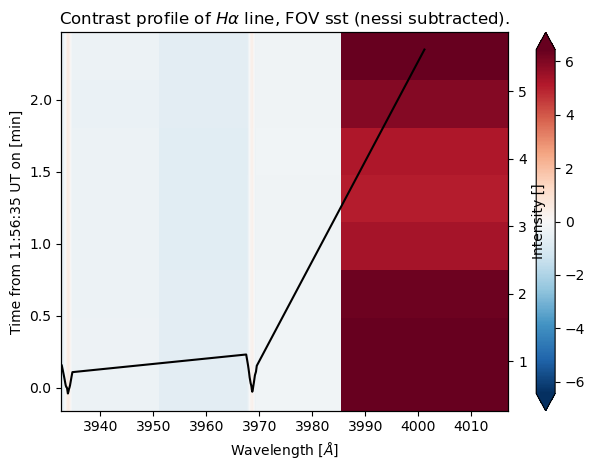

In [36]:
theta = [ 1.750e-01,  1.487e-01,  9.732e-01]
theor_line = theor_CaK

f_nessi_clv = interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.sst_clv[12] + theta[1]
                                  , kind='linear', fill_value="extrapolate")
QS = f_nessi_clv(sst_data._wavel)

Z = FOV_spectrum - QS
x = sst_data._wavel
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, FOV sst (nessi subtracted).')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,QS, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

The longer stripes here on the contrast plot come from the differences between nessi en quiet sun which was not an as good fit as hoped

### For the full disk profile

(8, 39) [ 0.23589111  0.25688194  0.3595266   0.43339824  0.521025    0.63225085
  0.74310721  0.87038628  0.95999433  1.02404551  1.03595321  1.05922121
  1.05387206  1.01038235  0.97683472  0.88099087  0.78831293  0.58949341
  0.47165113  0.43027816  0.42827568  0.48978694  0.54502829  0.60907839
  0.68845414  0.76628486  0.83999793  0.88154945  0.91186236  0.91402488
  0.88408542  0.83706818  0.77451     0.70591722  0.62883834  0.5445119
  0.48927942  0.67908025 12.04886924] [3932.69984001 3932.85032001 3933.04944001 3933.14976001 3933.25008001
 3933.3504     3933.45072    3933.54952    3933.63008    3933.7
 3933.76992    3933.85048    3933.94928    3934.0496     3934.14991999
 3934.25023999 3934.35055999 3934.54967999 3934.70015999 3967.49984001
 3967.65032001 3967.84944001 3967.94976001 3968.05008001 3968.1504
 3968.25072    3968.34952    3968.43008    3968.5        3968.56992
 3968.65048    3968.74928    3968.8496     3968.94991999 3969.05023999
 3969.15055999 3969.34967999 3969.

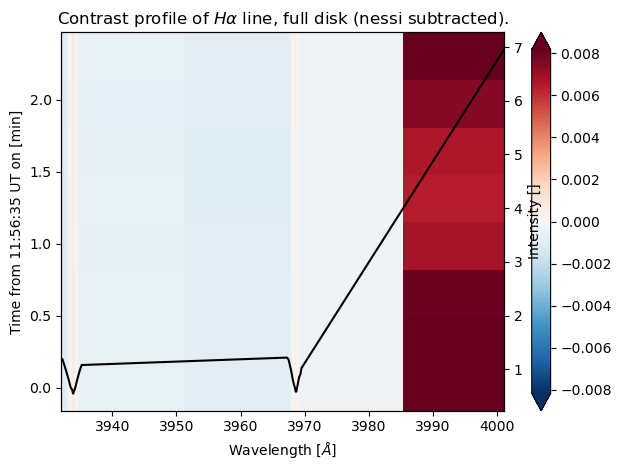

In [37]:
theta = [ 1.750e-01,  1.487e-01,  9.732e-01]

wav = un.merge_wavelengths(sst_data._wavel, theor_line.sst_wav+ sst_data.theta_nessi_to_quiet_sun[0])

f_nessi_clv = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.sst_clv[12] + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_sst = interp1d(sst_data._wavel, sst_data.av_spect/sst_data.scalar, kind='linear', fill_value="extrapolate")

print(np.shape(FOV_spectrum), FOV_spectrum[0], sst_data._wavel)
# print([(interp1d(sst_data._wavel, FOV_spectrum[0], kind='linear', fill_value="extrapolate")(wav)) for i in range(np.shape(FOV_spectrum)[0])])
# print(f_sst(wav))

areafactor = 60**2 / (np.pi*950**2)


# relative = sst_full / f_nessi(theta)(wav)


QS_clv = f_nessi_clv(theta)(wav)

sst_full = f_nessi(theta)(wav) + areafactor * (f_sst(wav) - f_nessi_clv(theta)(wav))

Z_full_disk = np.array([areafactor*(interp1d(sst_data._wavel, FOV_spectrum[i], kind='linear', fill_value="extrapolate")(wav) - QS_clv)
                        for i in range(np.shape(FOV_spectrum)[0])])
x = wav
y = TIME
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z_full_disk, cmap='RdBu_r', vmin=-np.max(Z_full_disk), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, full disk (nessi subtracted).')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,f_nessi(theta)(wav), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

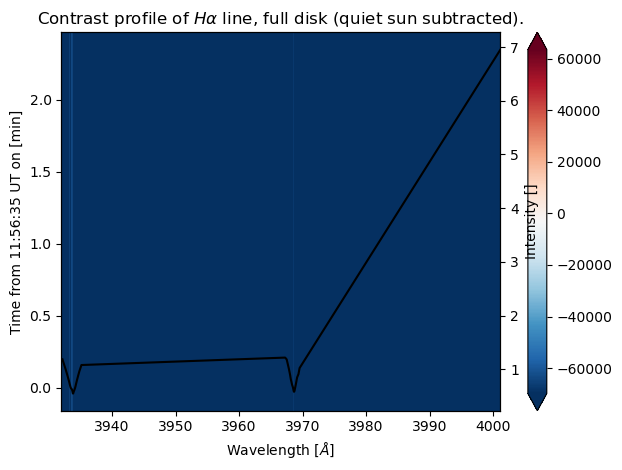

In [38]:
theta = [ 1.750e-01,  1.487e-01,  9.732e-01]


wav = un.merge_wavelengths(sst_data._wavel, theor_line.sst_wav+ sst_data.theta_nessi_to_quiet_sun[0])

f_sun_patch_clv = interp1d(sst_data._wavel, sst_data.quiet_spect/sst_data.scalar, kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_sst = interp1d(sst_data._wavel, sst_data.av_spect/sst_data.scalar, kind='linear', fill_value="extrapolate")

QS_from_qs_patch = f_sun_patch_clv(wav)

sst_full = f_nessi(theta)(wav) + areafactor * (f_sst(wav) - QS_from_qs_patch)

Z_full_disk = np.array([areafactor*(interp1d(sst_data._wavel, FOV_spectrum[i], kind='linear', fill_value="extrapolate")(wav) - QS_from_qs_patch)
                        for i in range(np.shape(FOV_spectrum)[0])])
x = wav
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z_full_disk, cmap='RdBu_r', vmin=-np.max(Z_full_disk), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, full disk (quiet sun subtracted).')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,f_nessi(theta)(wav), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

## maybe centroid analysis between nessi + sst and harps ?

# The different footprints of flare things in its spectrum

- Ribbon area to some of the line increases.
- adding spectrum of differnt places to the movies
- flare area
- ...

# What if the flare was 10 times bigger?

bring it to the disk center scale it en than put it on its spot again wit center to limb variation

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [7] at time ['t=16:28:32 UT'].
The SST data runs from t=16:26:14 UT to t=16:28:32 UT.
The areafactor for THIS flare is -9.755503436406944e-06 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: -0.78%.


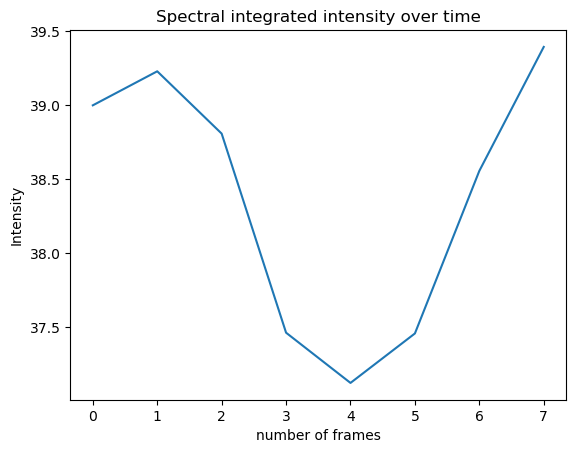

In [39]:
un.save_for_further_analysis(CaK, theor_CaK)


# Movie Making

In [40]:
reload(un)

<module 'use_nessi3' from 'E:\\solar flares/data/2017-09-06\\use_nessi3.py'>

[-4.547473508864641e-13, 0, 8.407664208674685]
Intensity limit calculation for first time.
Intensity limit is saved.
Frame: 0, 16:26:14.113, total number of frames: 8 


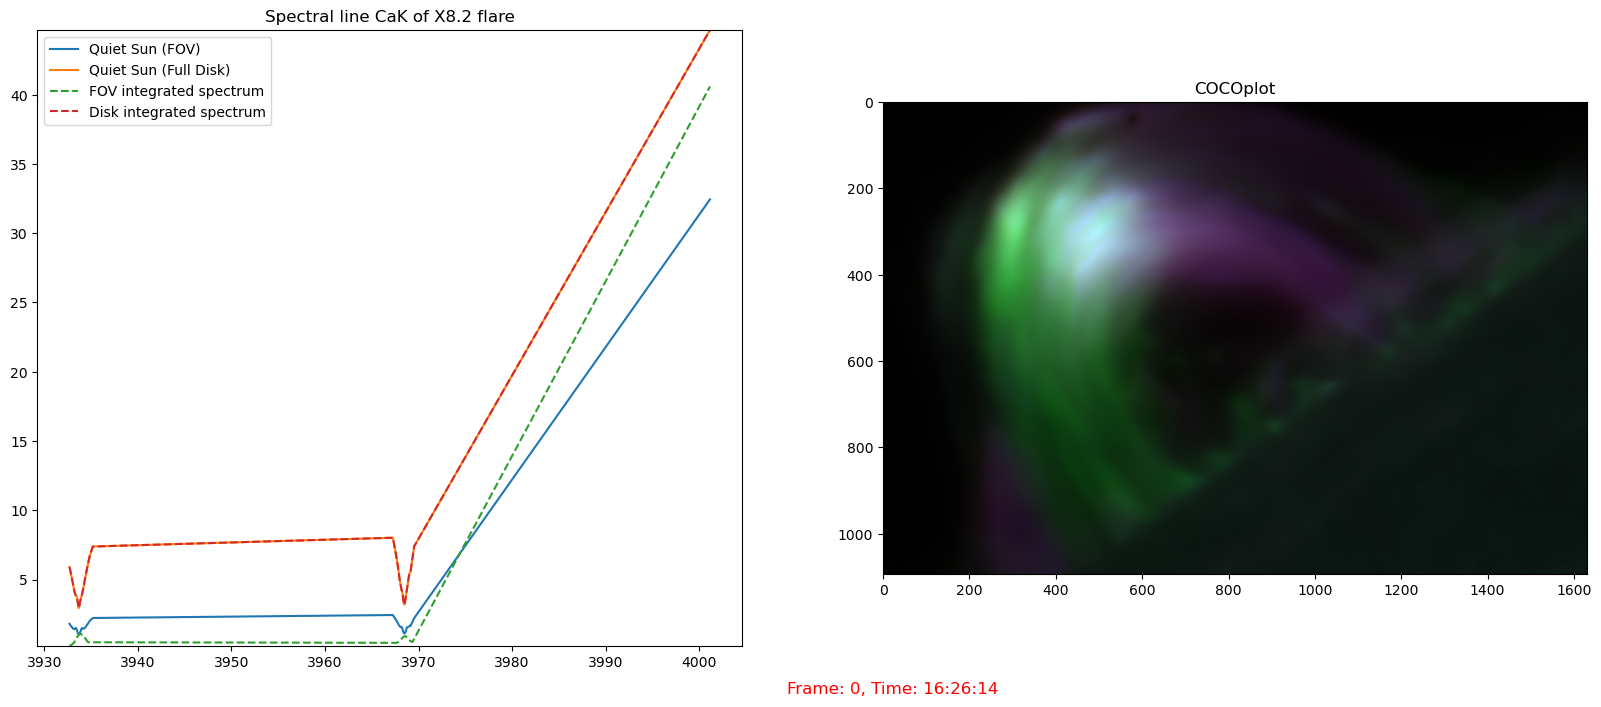

In [41]:
# fill in here all arguments
theor_line = theor_line
sst_data = CaK
name_of_flare = "X8.2"
name_of_line = "CaK"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line)

In [ ]:
exit()

: 